In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [4]:
df = pd.read_csv(f'{path}/books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


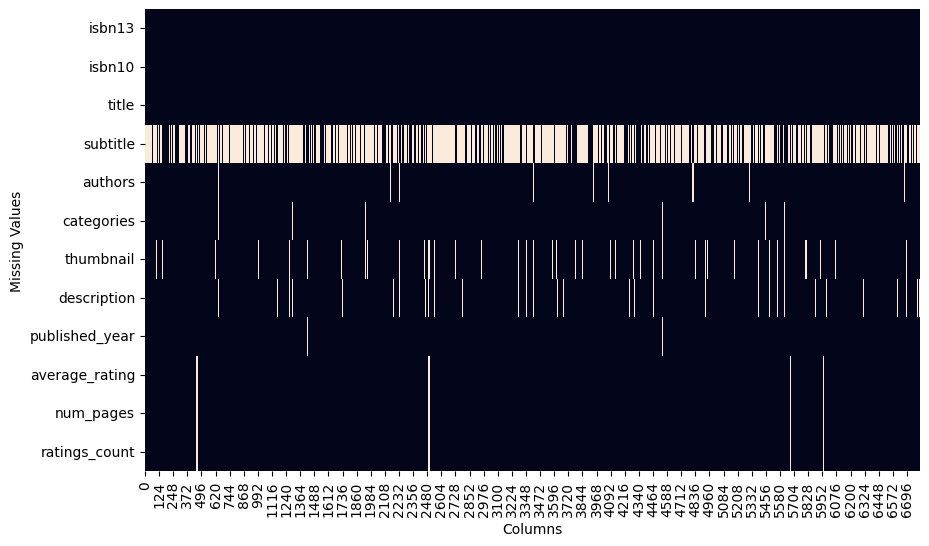

In [5]:
# Ensure plots are displayed inline within the notebook
%matplotlib inline
plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel('Columns')
plt.ylabel('Missing Values')

plt.show(block=True)

In [9]:
df['missing_description'] = np.where(df['description'].isna(),0,1)
df['age_of_book'] = 2025 - df['published_year']

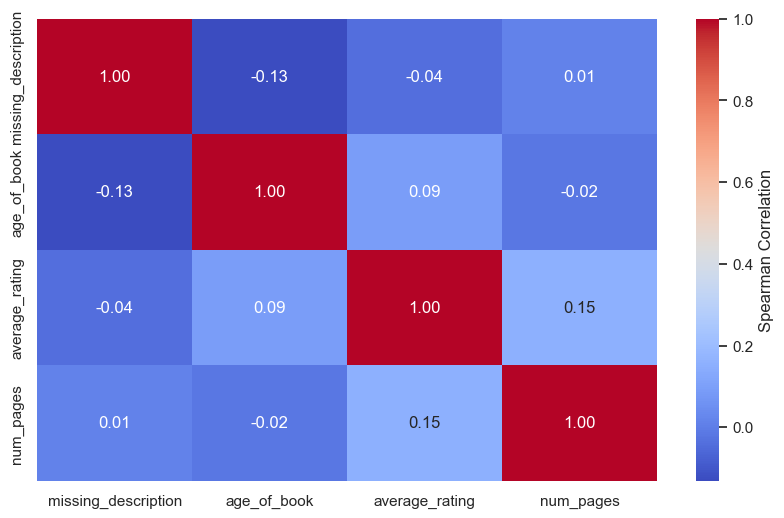

In [10]:
imp_columns = ['missing_description', 'age_of_book', 'average_rating', 'num_pages']
#  spearman good for non continous value
correlation = df[imp_columns].corr(method='spearman')

sns.set_theme(style="white")
plt.figure(figsize=(10, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f', cbar_kws={'label': 'Spearman Correlation'})

plt.show(block=True)

In [14]:
missing_df = df[~(df['description'].isna()) & ~(df['average_rating'].isna()) & ~(df['num_pages'].isna()) & ~(df['published_year'].isna())]

In [16]:
missing_df['categories'].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [20]:
missing_df['word_per_description'] = missing_df['description'].str.split().str.len()
missing_df['word_per_description'].describe()

C:\Users\admin\AppData\Local\Temp\ipykernel_5364\620818106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['word_per_description'] = missing_df['description'].str.split().str.len()


count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: word_per_description, dtype: float64

In [21]:
missing_df.loc[missing_df['word_per_description'].between(1,4), 'description']
# description between 1 and 4 words is very short to add any value to the model

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [25]:
missing_df.loc[missing_df['word_per_description'].between(24,38), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
36      A magical and fantastic collection of early st...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1906, dtype: object

In [26]:
missing_df_25_words = missing_df[missing_df['word_per_description'] >= 25]

In [27]:
missing_df_25_words['title_subtitle'] = np.where(
    missing_df_25_words['subtitle'].isna(), missing_df_25_words['title'], missing_df_25_words['title'] + ':' + missing_df_25_words['subtitle'])

C:\Users\admin\AppData\Local\Temp\ipykernel_5364\1202848864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df_25_words['title_subtitle'] = np.where(


In [28]:
missing_df_25_words['title_subtitle']

0                                                  Gilead
1                                    Spider's Web:A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805        I Am that:Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: title_subtitle, Length: 5197, dtype: object

In [29]:
# combine isbn13 and description to create tagged description
missing_df_25_words['tagged_description'] = missing_df_25_words['isbn13'].astype(str) + ' ' + missing_df_25_words['description']

C:\Users\admin\AppData\Local\Temp\ipykernel_5364\1151587685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df_25_words['tagged_description'] = missing_df_25_words['isbn13'].astype(str) + ' ' + missing_df_25_words['description']


In [30]:
missing_df_25_words.drop(['title', 'subtitle', 'description', 'isbn13','word_per_description','age_of_book'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_5364\2623126321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df_25_words.drop(['title', 'subtitle', 'description', 'isbn13','word_per_description','age_of_book'], axis=1, inplace=True)


In [31]:
missing_df_25_words.to_csv('books_data_cleaned.csv', index=False)